# The Optimal Asshole Portfolio

## Aim of project and underlying assumptions:

The aim of this project is to find the optimal portfolio combination of the following stocks:
- RCI Hospitality Holdings Inc (RICK)
- Philip Morris International (PM)
- AeroVironment, Inc. (AVAV)
- Ferrari N.V. (RACE)
- Las Vegas Sands (LVS)
- Canopy Growth (CGC)
- Tiffany & Co. (TIF)
- Tesla Motors (TSLA)

To find the optimal portfolio, we take an offset in Modern Portfolio Theory, finding the portfolio combination that bears the lowest risk i.e. the Minimum Variance Portolio (MVP).  To find the optimal portfolio, we furthermore make use of the Capital Asset Pricing Model (CAPM), which ultimately gives us the portfolio with the optimal ratio between expected return and risk i.e where we maximze the sharpe-ratio.  

In our model we make the following assumptions: 

- Investors are rational and risk-averse. 
- Historical returns is representative for future returns.
- Investors are price takers, meaning they cannot influence future prices.
- No transaction cost
- Investors can lend and borrow unlimited at the same risk free rate

Lastly we assume 253 trading days a year, and look at data from january 1st 2010 untill january 1st 2020 to make our estimations. Therfore our results will be showing the optimal portfolio per January 1st 2020. 





In [32]:
## packages and imports
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.stats as scs
import scipy.optimize as sco
import statsmodels.api as sm
import scipy.interpolate as sci
from pandas_datareader import data as pdr
import yfinance as yf

First we get all data into the file, and use the dividend-adjusted closing prices as the closing price for a given stock

In [33]:
# Time period and stocks: 
start_date = datetime.datetime(2010,1,1)
end_date = datetime.datetime(2020,1,1)
sym = ["RICK","PM","AVAV", "RACE","LVS","CGC","TIF","TSLA"]
stocks = len(sym)


# get data as dataframe:
yf.pdr_override() 
data = pdr.get_data_yahoo(sym, start=start_date, end=end_date)["Adj Close"]
data.iloc[np.r_[0:2, -2:0]]

[*********************100%***********************]  8 of 8 completed


AVAV        CGC        LVS         PM        RACE       RICK  \
Date                                                                            
2009-12-31  29.080000        NaN   9.963785  29.802292         NaN   8.298623   
2010-01-04  29.610001        NaN  11.084208  30.519670         NaN   8.870609   
2019-12-30  62.779999  18.790001  67.944542  84.190605  164.142273  20.273634   
2019-12-31  61.740002  21.090000  67.689629  83.591347  164.380569  20.453224   

                   TIF        TSLA  
Date                                
2009-12-31   35.126648         NaN  
2010-01-04   35.935379         NaN  
2019-12-30  132.783920  414.700012  
2019-12-31  132.953033  418.329987

Secondly we calculate daily returns as todays adj. closing price divided by yesterdays adj. closing price. We take the natural logarithm of this to show returns in percentage.

In [34]:
# Calculate log daily returns

log_daily_return = np.log(data / data.shift(1))
log_daily_return.iloc[np.r_[0:2, -2:0]]


AVAV       CGC       LVS        PM      RACE      RICK  \
Date                                                                     
2009-12-31       NaN       NaN       NaN       NaN       NaN       NaN   
2010-01-04  0.018062       NaN  0.106564  0.023786       NaN  0.066654   
2019-12-30  0.011696 -0.022106 -0.006329 -0.007093 -0.020479  0.014374   
2019-12-31 -0.016704  0.115474 -0.003759 -0.007143  0.001451  0.008819   

                 TIF      TSLA  
Date                            
2009-12-31       NaN       NaN  
2010-01-04  0.022762       NaN  
2019-12-30 -0.002245 -0.037113  
2019-12-31  0.001273  0.008715

Now we plot cumulative returns, which shows us the performance of each individuals stock from 2010 to 2020. 

Text(0, 0.5, 'Cumulative return, in %')

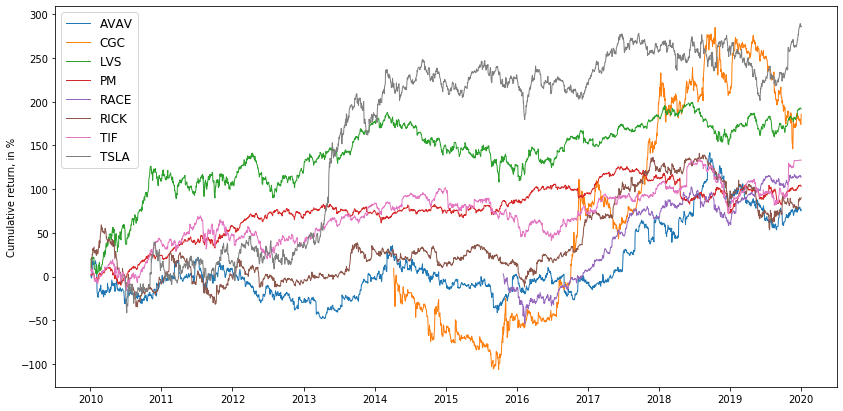

In [35]:
# log returns to avoid compound effect

################################################################

# stock performance
# evt kombinér stock performance + daily returns 

Performance = log_daily_return.cumsum() * 100
Performance.iloc[np.r_[0:2, -2:0]]


plt.figure(figsize=(14, 7))
for x in log_daily_return.columns.values:
    plt.plot(log_daily_return.index, Performance[x], lw=1, alpha=1, label=x)
plt.legend(fontsize=12)
plt.ylabel('Cumulative return, in %')

Below is the logged daily returns for each shock shown in a simple plot

Text(0, 0.5, 'Daily returns')

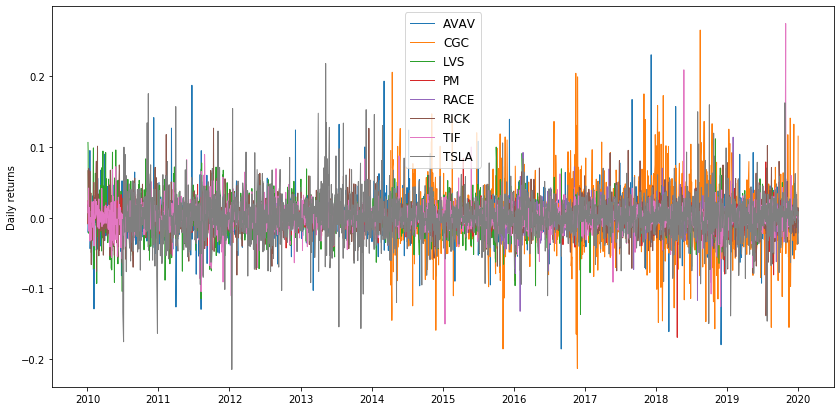

In [36]:
# plot log_daily_returns

plt.figure(figsize=(14, 7))
for c in log_daily_return.columns.values:
    plt.plot(log_daily_return.index, log_daily_return[c],lw=1, alpha=1, label=c)
plt.legend(fontsize=12)
plt.ylabel('Daily returns')

To find the expected returns and their corresponding variances, we calculate average return per year

In [37]:
yearly_trading_days = 253

# Mean returns, YoY

AY_return = log_daily_return.mean() * yearly_trading_days
Avg_yearly_return = pd.DataFrame()
Avg_yearly_return["Avg. annual return"] = AY_return 
Avg_yearly_return["Avg. annual return"] = pd.Series(["{0:.2f}%".format(val*100) for val in Avg_yearly_return['Avg. annual return']],index = Avg_yearly_return.index)
Avg_yearly_return

Based on our annual returns, we create a covariance matrix showing how each stock covariate meaning how one stocks react to a change of the price of another stock.

In [38]:
# Covariance Matrix with mean return

CovMatrix = log_daily_return.cov() * yearly_trading_days
CovMatrix

AVAV       CGC       LVS        PM      RACE      RICK       TIF  \
AVAV  0.161158  0.017369  0.031635  0.013433  0.023851  0.024195  0.033553   
CGC   0.017369  0.504169  0.024120  0.006947  0.022110  0.004618  0.016232   
LVS   0.031635  0.024120  0.126548  0.018483  0.030962  0.031991  0.048068   
PM    0.013433  0.006947  0.018483  0.037754  0.008870  0.010668  0.015127   
RACE  0.023851  0.022110  0.030962  0.008870  0.087745  0.017973  0.024020   
RICK  0.024195  0.004618  0.031991  0.010668  0.017973  0.114131  0.023689   
TIF   0.033553  0.016232  0.048068  0.015127  0.024020  0.023689  0.094391   
TSLA  0.035864  0.023991  0.044943  0.011950  0.037597  0.028537  0.038307   

          TSLA    Mean  
AVAV  0.035864   7.57%  
CGC   0.023991  32.50%  
LVS   0.044943  19.27%  
PM    0.011950  10.37%  
RACE  0.037597  27.23%  
RICK  0.028537   9.07%  
TIF   0.038307  13.38%  
TSLA  0.263141  30.27%

Weight

In [39]:
weights = np.random.random(stocks)
weights /= np.sum(weights)
weights.sum()


1.0

We now calculate the Expected return

In [40]:
np.sum(log_daily_return.mean() * weights) * 253

0.15567414316249284

The Variance is calculated

In [41]:

np.dot(weights.T, np.dot(log_daily_return.cov() * 253, weights))

0.0460423704373551

Finally the Standard Deviation is calculated before we can go into our Monte Carlo Simulation

In [42]:
np.sqrt(np.dot(weights.T, np.dot(log_daily_return.cov() * 253, weights)))

0.21457485975145155

Simulation of portolio using Monte Carlo.

In [43]:
portfolio_return = [] 
portfolio_variance = [] 

for p in range (10000):
 

 weights = np.random.random(stocks)
 weights /= np.sum(weights)
 
 portfolio_return.append(np.sum(log_daily_return.mean() * weights) * 253)

 portfolio_variance.append(np.sqrt(np.dot(weights.T, np.dot(log_daily_return.cov() * 253, weights))))


portfolio_return = np.array(portfolio_return)
portfolio_variance = np.array(portfolio_variance)

print(portfolio_return)
print(portfolio_variance)

print(stocks)


[0.18200162 0.2042823  0.18934721 ... 0.17137766 0.14349982 0.1970293 ]
[0.21299949 0.22650425 0.22639485 ... 0.20856945 0.19730726 0.2205477 ]
8


Plotting all possible combinations of our portfolio

Text(0, 0.5, 'Expected Return of Portfolio')

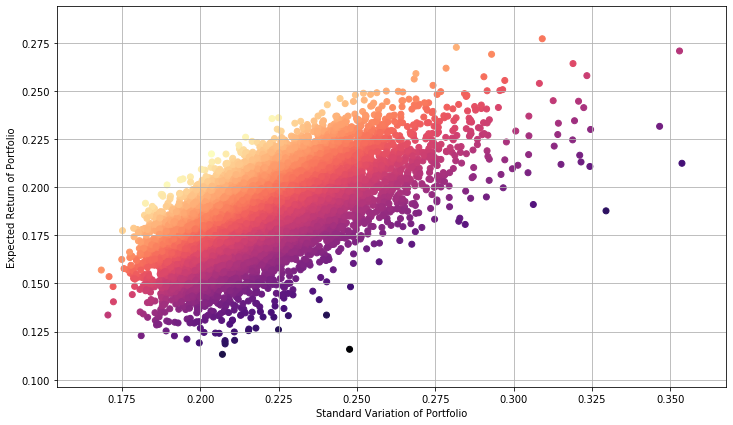

In [44]:
plt.figure(figsize=(12, 7))
plt.scatter(portfolio_variance, portfolio_return, c = portfolio_return / portfolio_variance, marker='o', cmap='magma')

plt.grid(True)
plt.xlabel('Standard Variation of Portfolio')
plt.ylabel('Expected Return of Portfolio')

The following is pure copy paste

In [45]:

def portfolio(weights):
 weights = np.array(weights)
 portfolio_return = np.sum(log_daily_return.mean() * weights) * 253 # Portfolio annulized return
 portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(log_daily_return.cov() * 253, weights))) # Portfolio annulized standard deviation
 return np.array([portfolio_return, portfolio_variance, portfolio_return / portfolio_variance]) # Portfolio annulized return, Portfolio annulized standard deviation, Portfolio Sharpe ratio

In [46]:
def min_func_sharpe(weights):
 return -portfolio(weights)[2]

In [47]:
cons = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
#this is a dictionary with two objects, that constrains the optimization
print(cons)

{'type': 'eq', 'fun': <function <lambda> at 0x000002B154EA0A68>}


In [48]:
bnds = tuple((0, 1) for x in range(stocks))

print(bnds)

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))


More copy paste to find the optimal sharpe ratio portfolio

In [49]:

%%time
opts = sco.minimize(min_func_sharpe, stocks * [1. / stocks,], method='SLSQP', bounds=bnds, constraints=cons)

Wall time: 766 ms


In [50]:
opts

     fun: -1.116647970116754
     jac: array([ 2.36531854e-01, -2.06485391e-04, -4.18126583e-05,  5.50448895e-05,
        1.81943178e-05,  1.41745508e-02, -3.27378511e-05, -4.17530537e-05])
 message: 'Optimization terminated successfully.'
    nfev: 102
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.        , 0.08360294, 0.06590262, 0.30639078, 0.43151399,
       0.        , 0.00162897, 0.1109607 ])

In [51]:
print(opts['x'].round(2))
print(sym)
#creates nparray based on key 'x' from the optimization, and rounds to 3 digit

[0.   0.08 0.07 0.31 0.43 0.   0.   0.11]
['RICK', 'PM', 'AVAV', 'RACE', 'LVS', 'CGC', 'TIF', 'TSLA']


In [52]:
portfolio(opts['x']).round(2)

array([0.22, 0.2 , 1.12])

In [53]:
round(opts['x'].sum(),2)

1.0

Copy to find minimum variance portfolio

In [54]:

def min_func_variance(weights):
     return portfolio(weights)[1] ** 2 # portfolio variance

In [55]:
%%time
optv = sco.minimize(min_func_variance, stocks * [1. / stocks,], method='SLSQP', bounds=bnds,
constraints=cons)

Wall time: 863 ms


In [56]:
optv

     fun: 0.0255609315341639
     jac: array([0.05134463, 0.05072884, 0.05156491, 0.05112211, 0.05151256,
       0.05065797, 0.0510259 , 0.0509676 ])
 message: 'Optimization terminated successfully.'
    nfev: 111
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([0.04867438, 0.02984542, 0.        , 0.54425664, 0.16454932,
       0.11330753, 0.08459678, 0.01476993])

In [57]:
optv['x'].round(3)

array([0.049, 0.03 , 0.   , 0.544, 0.165, 0.113, 0.085, 0.015])

In [58]:
portfolio(optv['x']).round(3)

array([0.141, 0.16 , 0.88 ])

Even more copy to find the efficient frontier

In [59]:

def min_func_port(weights):
     return portfolio(weights)[1] #portfolio function

In [60]:

cons = ({'type': 'eq', 'fun': lambda x: portfolio(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)
#normal bounds for optimization

In [61]:

%%time
trets = np.linspace(0.13, 0.24, 20) # target return, within 0 % to 25 %, 100 samples
tvols = []
for tret in trets:
 cons = ({'type': 'eq', 'fun': lambda x: portfolio(x)[0] - tret}, {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
 res = sco.minimize(min_func_port, stocks * [1. / stocks,], method='SLSQP', bounds=bnds, constraints=cons)
 tvols.append(res['fun'])
tvols = np.array(tvols)

Wall time: 26.6 s


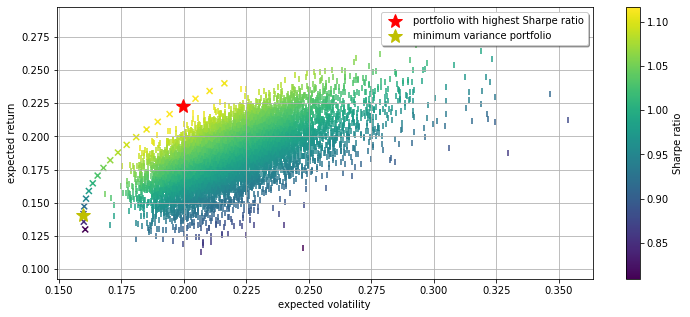

In [62]:
plt.figure(figsize=(12, 5))
plt.scatter(portfolio_variance, portfolio_return,
 c=portfolio_return / portfolio_variance, marker='|', cmap ='viridis')
 # random portfolio composition
plt.scatter(tvols, trets,
 c=trets / tvols, marker='x', cmap='viridis')
 # efficient frontier
plt.plot(portfolio(opts['x'])[1], portfolio(opts['x'])[0],
 'r*', markersize=15.0,label ='portfolio with highest Sharpe ratio')
 # portfolio with highest Sharpe ratio
plt.plot(portfolio(optv['x'])[1], portfolio(optv['x'])[0],
 'y*', markersize=15.0,label ='minimum variance portfolio')
 # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.legend(loc='upper right', shadow=True, ncol=1)

Capital market line (copy)

In [63]:
ind = np.argmin(tvols) # index number of portfolio 
evols = tvols[ind:] # indexed portfolios volatility
erets = trets[ind:] # indexed portolfios return

In [64]:

tck = sci.splrep(evols, erets) # Cubic splines interpolation based
                               # on the indexed portfolios' values of
                               # return and volatility

In [65]:
def f(x):
#Efficient frontier function (splines approximation)
 return sci.splev(x, tck, der=0)
def df(x):
#First derivative of efficient frontier function
 return sci.splev(x, tck, der=1)

In [66]:
def equations(z, rf):
    eq1 = rf - z[0]  
    eq2 = rf + z[1] * z[2] - f(z[2])
    eq3 = z[1] - df(z[2])
    return eq1, eq2, eq3

def riskfree(rf):
    return(sco.fsolve(equations, [0.01, 0.5, 0.15], rf))

In [67]:
riskfree(0.06)

array([0.06      , 0.90667318, 0.23104885])

In [71]:
def CAPM_FIGURE(rf, portfolio_variance=portfolio_variance, portfolio_return=portfolio_return , p=p ):
    plt.figure(figsize=(16, 8))
    plt.scatter(portfolio_variance, portfolio_return,
    c=(portfolio_return - 0.01) / portfolio_variance, marker='o', cmap='viridis')
    # random portfolio composition
    plt.plot(evols, erets, 'black', lw=4.0)
    # efficient frontier
    cx = np.linspace(0.0, 0.3)
    temp = riskfree(rf)  #making a temp, so it doesnt have to calculate riskfree over and over. 
    plt.plot(cx, temp[0] + temp[1] * cx, lw=1.5)
    # capital market line
    plt.plot(temp[2], f(temp[2]), 'r*', markersize=15.0)
    plt.grid(True)
    plt.axhline(0, color='k', ls='-', lw=2.0)
    plt.axvline(0, color='k', ls='-', lw=2.0)
    plt.ylim(-0.1 , 0.35)
    plt.xlabel('expected volatility')
    plt.ylabel('expected return')
    plt.colorbar(label='Sharpe ratio')
    plt.show()

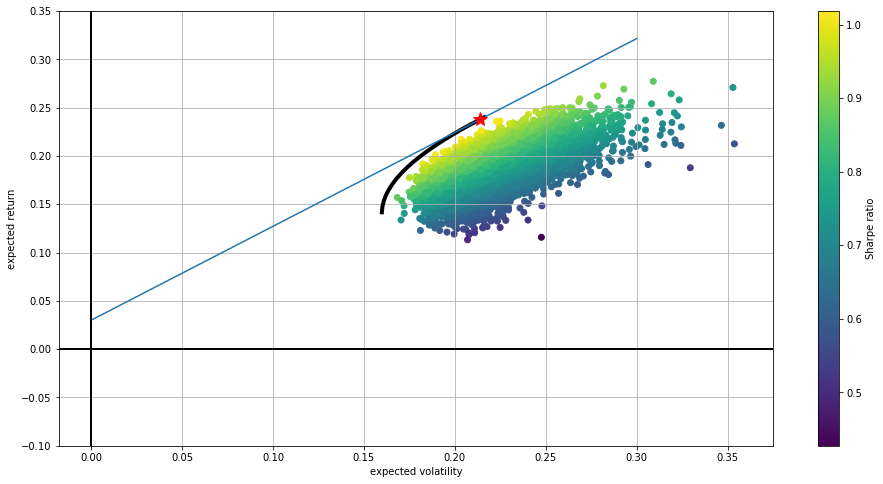

In [72]:
CAPM_FIGURE(0.03)

In [75]:
widgets.interact(CAPM_FIGURE,
                 rf = widgets.FloatSlider(description="$Riskfree$", min=-0.1, max=0.1, step=0.01, value=0),
                 portfolio_variance = widgets.fixed(portfolio_variance),
                 portfolio_return=widgets.fixed(portfolio_return),
                 p=widgets.fixed(p)
                );

###

interactive(children=(FloatSlider(value=0.0, description='$Riskfree$', max=0.1, min=-0.1, step=0.01), Output()…